Kriss Sitapara Assignment 1A - CS370-101

Simulation of Multivariate Normal Distribution

In [26]:
import torch
import matplotlib.pyplot as plt

In [27]:
#distribution a
amean = torch.tensor([-0.5, -0.5])
acov = torch.tensor([[1.0, 0.25], [0.25, 1.0]])
adistribution = torch.distributions.MultivariateNormal(amean, acov)
asamples = adistribution.sample((1000,))

In [28]:
#distribution b
bmean = torch.tensor([0.5, 0.5])
bcov = torch.tensor([[1.0, 0.25], [0.25, 1.0]])
bdistribution = torch.distributions.MultivariateNormal(bmean, bcov)
bsamples = bdistribution.sample((1000,))

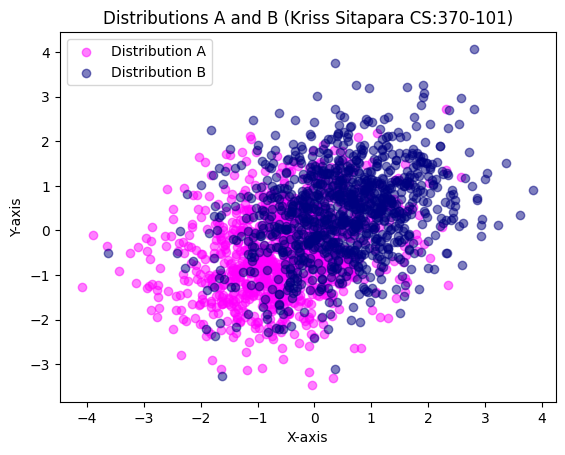

Stacked tensor shape: torch.Size([2000, 2])


In [29]:
#plotting
plt.scatter(asamples[:, 0], asamples[:, 1], label='Distribution A', color='magenta', alpha=0.5)
plt.scatter(bsamples[:, 0], bsamples[:, 1], label='Distribution B', color='navy', alpha=0.5)
plt.title('Distributions A and B (Kriss Sitapara CS:370-101)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

X = torch.cat([asamples, bsamples], dim=0)
print("Stacked tensor shape:", X.shape)

--------------------------------------------------------------------------------------------------------------------------------------------------------

K-Means Clustering

In [30]:
k=2

In [31]:
#making centroids and assigning points
def initcentroids(X, k):
    inds = torch.randperm(X.shape[0])[:k] 
    return X[inds]

def clusters(X, centroids):
    distances = torch.cdist(X, centroids) 
    clusterchange = torch.argmin(distances, dim=1)
    return clusterchange

def updatecentroids(X, clusterchange, k):
    newcentroid = torch.stack([X[clusterchange == j].mean(dim=0) for j in range(k)])
    return newcentroid

In [32]:
#kmeans
def kmeans(X, k=2, num_iters=100):
    centroids = initcentroids(X, k)
    for i in range(num_iters):
        clusterchange = clusters(X, centroids) 
        newcentroids = updatecentroids(X, clusterchange, k)

        if torch.allclose(centroids, newcentroids, atol=1e-6):
            print(f"Converged in {i+1} iterations.")
            break

        centroids = newcentroids
    return centroids, clusterchange

centroids, clusterchange = kmeans(X, k=2)

Converged in 11 iterations.


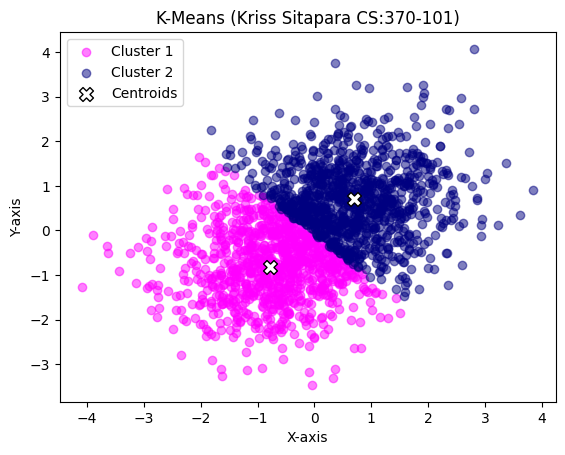

In [33]:
#plotting
colors = ['magenta', 'navy']

for i in range(k):
    plt.scatter(X[clusterchange == i][:, 0], X[clusterchange == i][:, 1], 
                color=colors[i], alpha=0.5, label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], color='white', marker='X', s=100, label='Centroids', edgecolors='black')
plt.title('K-Means (Kriss Sitapara CS:370-101)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------

Projection with Principal Components Analysis (PCA)


In [34]:
#generate data
X = torch.randn(100, 4)
X[:, 2] = 3 * X[:, 0] - 2 * X[:, 1] + torch.randn(100) * 0.1
X[:, 3] = 1.5 * X[:, 0] - 0.5 * X[:, 1] + torch.randn(100) * 0.1

In [35]:
#Standardize
pca_meanx = torch.mean(X, dim=0)
pca_centeredx = X - pca_meanx

In [36]:
#calculations
pca_covmatrix = torch.mm(pca_centeredx.T, pca_centeredx) / pca_centeredx.shape[0]
eigenvalues, eigenvectors = torch.linalg.eig(pca_covmatrix)
eigenvectors = eigenvectors.real
eigenvalues = eigenvalues.real 

pca_sortedinds = torch.argsort(eigenvalues, descending=True)
eigenvectors = eigenvectors[:, pca_sortedinds]

print(eigenvectors[:, :4])

tensor([[ 0.2166, -0.4787,  0.1597, -0.8357],
        [-0.1194, -0.8013,  0.3223,  0.4897],
        [ 0.8894,  0.1499,  0.3739,  0.2161],
        [ 0.3845, -0.3260, -0.8549,  0.1230]])


In [37]:
#checking
from sklearn.decomposition import PCA

X_np = pca_centeredx.detach().numpy()
pca_sklearn = PCA(n_components=4)
pca_sklearn.fit(X_np)
principal_comps_sklearn = pca_sklearn.components_.T
print("Scikit-learn PCA components:")
print(principal_comps_sklearn)


Scikit-learn PCA components:
[[ 0.21657525  0.4787477  -0.15973093  0.8356924 ]
 [-0.1193891   0.80128825 -0.32229877 -0.4897008 ]
 [ 0.8893991  -0.1499267  -0.37390444 -0.21607096]
 [ 0.38446146  0.3259751   0.85487133 -0.12298217]]
